Practice Questions for Titanic Dataset

1. Data Preprocessing:
Question: Write a Python function to calculate the percentage of missing values for each column in the dataset. Use the function to identify columns with missing values in the Titanic dataset and display their percentages. Visualize the missing data percentages using a bar plot.

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64


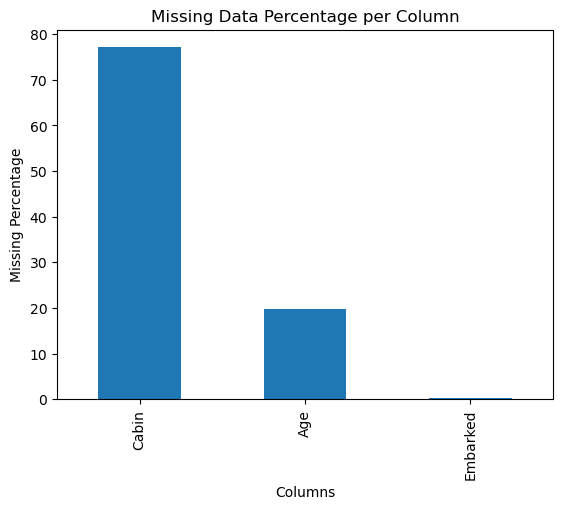

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Titanic dataset
df = pd.read_csv(r"D:\Downloads\titanic.csv")
def missing_percentage(dataframe):
    missing = dataframe.isnull().sum()
    percent = (missing / len(dataframe)) * 100
    return percent[percent > 0].sort_values(ascending=False)
missing_data = missing_percentage(df)
print(missing_data)
plt.figure()
missing_data.plot(kind='bar')
plt.xlabel("Columns")
plt.ylabel("Missing Percentage")
plt.title("Missing Data Percentage per Column")
plt.show()


2. Feature Creation:
Question: Create a new column Age_Category by categorizing passengers into three groups: Child (0-12), Teen (13-19), Adult (20+). Calculate the survival rate for each group and compare the results.

In [9]:
bins = [0, 12, 19, df['Age'].max()]
labels = ['Child', 'Teen', 'Adult']

df['Age_Category'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_survival = df.groupby('Age_Category', observed=True)['Survived'].mean()
print(age_survival)

Age_Category
Child    0.579710
Teen     0.410526
Adult    0.383636
Name: Survived, dtype: float64


3. Family Impact on Survival:
Question: Investigate the impact of family size on survival. Create a new column Large_Family (True if Family_Size > 3, False otherwise). Calculate and visualize the survival rate for passengers with large families versus those without using a bar plot.

Large_Family
False    0.388750
True     0.340659
Name: Survived, dtype: float64


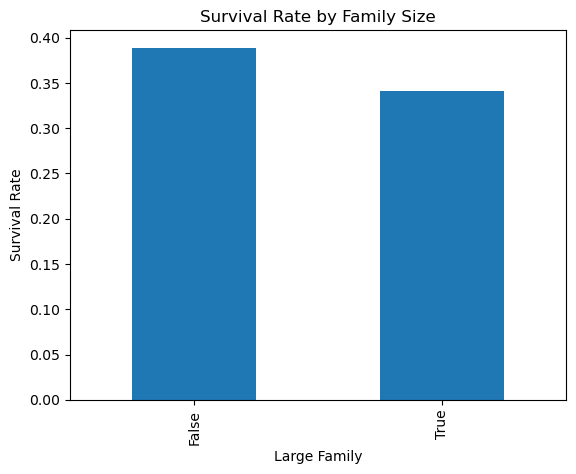

In [10]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Large_Family'] = df['Family_Size'] > 3

family_survival = df.groupby('Large_Family', observed=True)['Survived'].mean()
print(family_survival)

plt.figure()
family_survival.plot(kind='bar')
plt.xlabel("Large Family")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.show()


4. Passenger Class and Fare Analysis:
Question: Compare the distribution of Fare across the different Passenger_Class categories using a box plot. What can you conclude about the distribution of ticket prices for each class? Are there any outliers?

<Figure size 640x480 with 0 Axes>

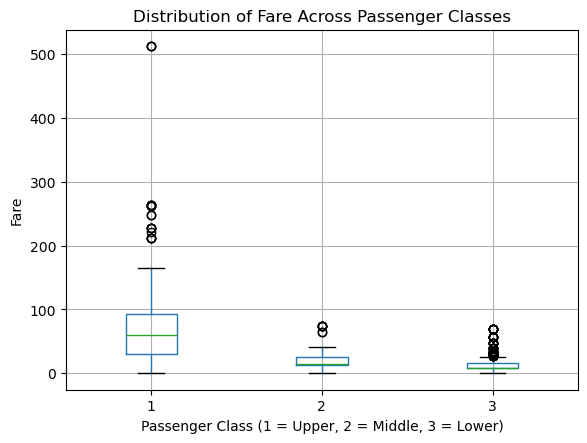

In [11]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='Fare', by='Pclass')
plt.xlabel("Passenger Class (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Fare")
plt.title("Distribution of Fare Across Passenger Classes")
plt.suptitle("")
plt.show()


Observation / Analysis

First Class (Pclass = 1) passengers paid the highest fares, with a wide spread of values.

Second Class (Pclass = 2) fares are moderate and less spread compared to first class.

Third Class (Pclass = 3) passengers paid the lowest fares, with most values concentrated at the lower end.

Outliers are clearly visible, especially in First Class, indicating some passengers paid exceptionally high ticket prices.

The fare distribution is right-skewed, particularly for higher classes.

5. Embarked Location Analysis:
Question: Analyze the survival rates based on the Embarked column (Cherbourg, Queenstown, and Southampton). Create a bar plot to visualize the survival rate for passengers who boarded at each of the three locations. Which embarkation point had the highest survival rate?

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


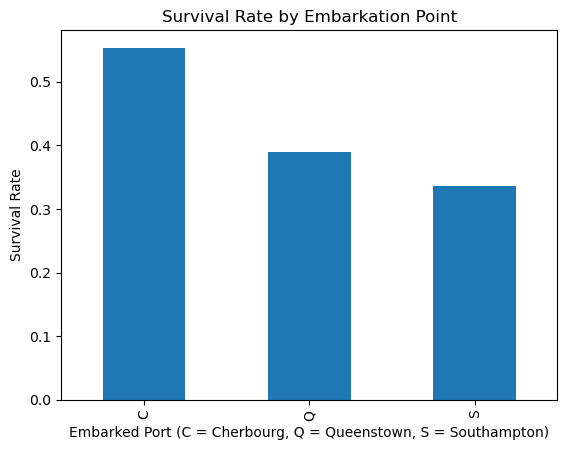

In [12]:
import matplotlib.pyplot as plt

embarked_survival = df.groupby('Embarked', observed=True)['Survived'].mean()
print(embarked_survival)

plt.figure()
embarked_survival.plot(kind='bar')
plt.xlabel("Embarked Port (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Embarkation Point")
plt.show()

Observation / Analysis

Passengers who embarked from Cherbourg (C) show the highest survival rate.

Queenstown (Q) has a moderate survival rate.

Southampton (S) shows the lowest survival rate among the three ports.

This pattern may be influenced by passenger class distribution, as Cherbourg had more first-class passengers.

6. Passenger Cabin Analysis:
Question: Investigate the Cabin column to check for missing or irregular data. Create a new column Has_Cabin where 1 indicates that a passenger has a cabin, and 0 indicates they do not. Calculate the survival rate for passengers with and without cabins. Visualize the results using a bar plot.

Has_Cabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


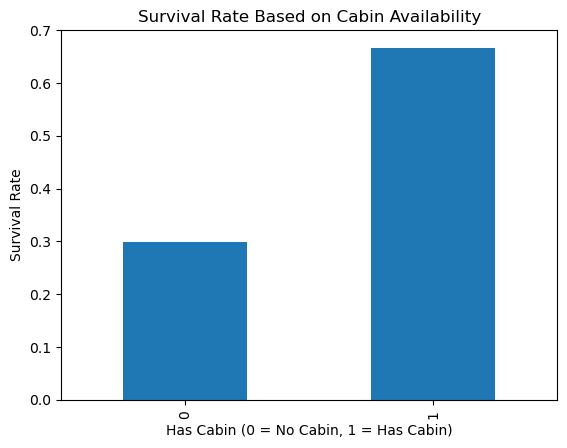

In [13]:
df['Has_Cabin'] = df['Cabin'].notnull().astype(int)

cabin_survival = df.groupby('Has_Cabin', observed=True)['Survived'].mean()
print(cabin_survival)

plt.figure()
cabin_survival.plot(kind='bar')
plt.xlabel("Has Cabin (0 = No Cabin, 1 = Has Cabin)")
plt.ylabel("Survival Rate")
plt.title("Survival Rate Based on Cabin Availability")
plt.show()


Observation / Analysis

Passengers with a cabin (Has_Cabin = 1) have a much higher survival rate.

Passengers without cabin information (Has_Cabin = 0) show a significantly lower survival probability.

The Cabin column contains many missing values, but missing data itself is informative.

Additional Practice Question: Wine Quality Dataset - Basic Data Exploration
Question:

Load the Wine Quality Dataset from the UCI Machine Learning Repository or from a CSV file.
Perform the following tasks:
1. Display the first 5 rows of the dataset.
2. Check if there are any missing values in the dataset.
3. Calculate and print the median of the alcohol and pH columns.
4. Create a box plot to show the distribution of the fixed acidity.
5. Create a pair plot to visualize the relationships between citric acid, residual sugar, and density.

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8   

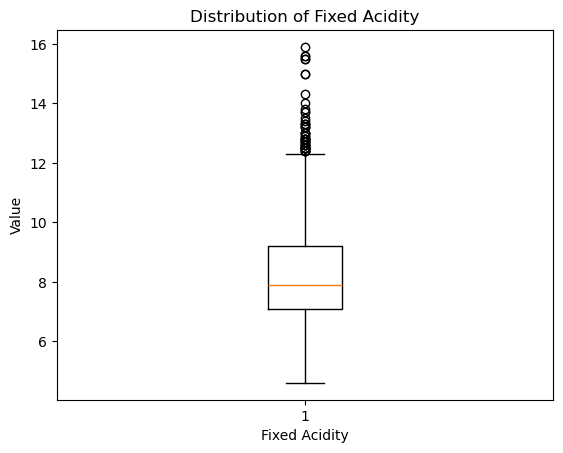

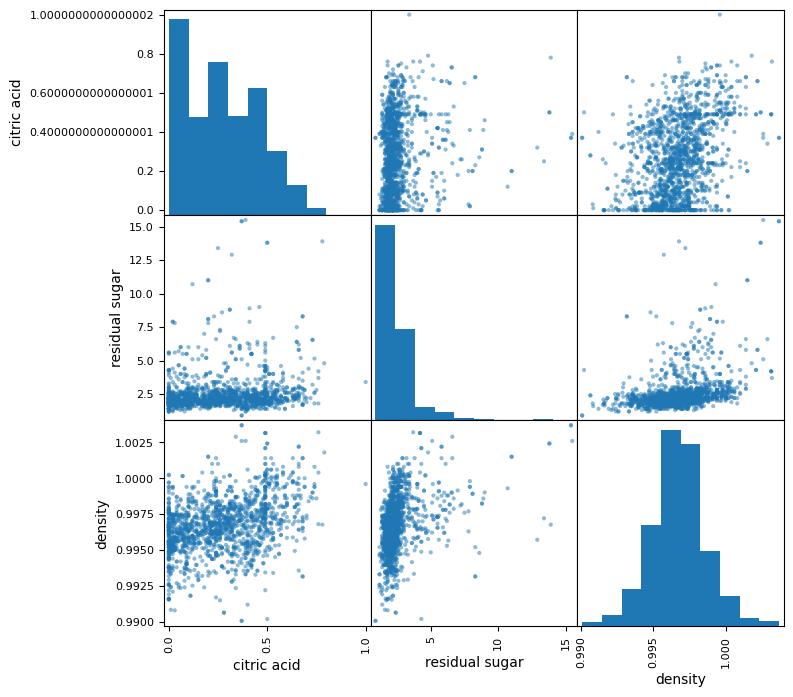

In [15]:
# WINE QUALITY DATASET
# BASIC DATA EXPLORATION
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Windows path using raw string)
wine = pd.read_csv(r"D:\Downloads\winequality-red.csv", sep=';')

# 1. Display first 5 rows
print("First 5 rows of the dataset:")
print(wine.head())

# 2. Check for missing values
print("\nMissing values in each column:")
print(wine.isnull().sum())

# 3. Median of alcohol and pH
print("\nMedian Alcohol:", wine['alcohol'].median())
print("Median pH:", wine['pH'].median())

# 4. Box plot for fixed acidity
plt.figure()
plt.boxplot(wine['fixed acidity'])
plt.xlabel("Fixed Acidity")
plt.ylabel("Value")
plt.title("Distribution of Fixed Acidity")
plt.show()

# 5. Pair plot (scatter matrix)
pd.plotting.scatter_matrix(
    wine[['citric acid', 'residual sugar', 'density']],
    figsize=(8, 8)
)
plt.show()
